In [1]:
import scipy.io
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from model.utils import loadHSI,calculate_aligned_accuracy
from lund.utils import GraphExtractor, diffusion_distance
from lund.lund import LearningbyUnsupervisedNonlinearDiffusion
from scipy.spatial.distance import pdist, squareform
import numpy as np 

Xmat = scipy.io.loadmat('X.mat')
Ymat = scipy.io.loadmat('Y.mat')

In [2]:
X_scipy = Xmat["X"]
GT_scipy = Ymat['Y']

In [3]:
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.show()

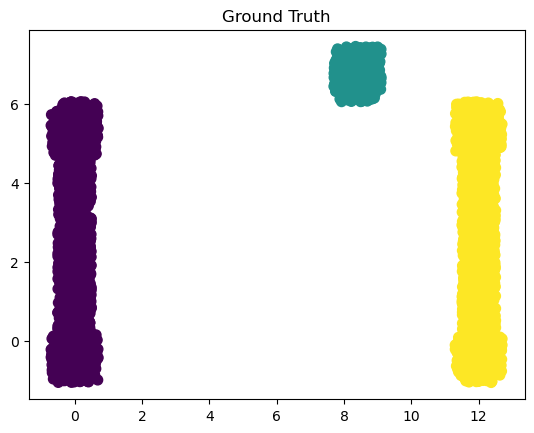

(6581, 2)


In [4]:
plot_clusters(X_scipy, GT_scipy, "Ground Truth")
print(X_scipy.shape)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Generate data for clusters
# # Left cluster
# cluster_1_x = np.random.normal(loc=0, scale=0.2, size=100)
# cluster_1_y = np.random.normal(loc=3, scale=1.0, size=100)

# # Center cluster
# cluster_3_x = np.random.normal(loc=8, scale=0.2, size=100)
# cluster_3_y = np.random.normal(loc=6, scale=0.2, size=100)

# # Right cluster
# cluster_2_x = np.random.normal(loc=12, scale=0.2, size=100)
# cluster_2_y = np.random.normal(loc=3, scale=1.0, size=100)

# # Combine x and y coordinates for each cluster into a single 2D array
# cluster_1 = np.column_stack((cluster_1_x, cluster_1_y))
# cluster_2 = np.column_stack((cluster_2_x, cluster_2_y))
# cluster_3 = np.column_stack((cluster_3_x, cluster_3_y))

# # Combine all clusters into one 2D array
# X = np.vstack((cluster_1, cluster_2, cluster_3))

# # Combine y coordinates for ground truth labels
# GT = np.hstack((cluster_1_y, cluster_2_y, cluster_3_y))

# # Create labels for clusters
# labels = np.array([0] * 100 + [1] * 100 + [2] * 100)

# # Plot the data with clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')
# plt.title('Ground Truth')
# plt.xlim(-1, 14)
# plt.ylim(-1, 8)
# plt.show()

# print("X shape:", X.shape)
# print("GT shape:", GT.shape)

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Generate data for the first cluster
# # left clusters
# cluster_1_x = np.random.normal(loc=0, scale=0.2, size=100)
# cluster_1_y = np.random.normal(loc=4, scale=0.5, size=100)
# cluster_4_x = np.random.normal(loc=0, scale=0.2, size=100)
# cluster_4_y = np.random.normal(loc=2, scale=0.5, size=100)

# # center cluster
# cluster_3_x = np.random.normal(loc=8, scale=0.2, size=100)
# cluster_3_y = np.random.normal(loc=6, scale=0.2, size=100)

# # Generate data for the second cluster
# # right clusters
# cluster_2_x = np.random.normal(loc=12, scale=0.2, size=100)
# cluster_2_y = np.random.normal(loc=4, scale=0.5, size=100)
# cluster_5_x = np.random.normal(loc=12, scale=0.2, size=100)
# cluster_5_y = np.random.normal(loc=2, scale=0.5, size=100)

# # Combine all clusters
# X = np.hstack((cluster_1_x, cluster_2_x, cluster_3_x, cluster_4_x, cluster_5_x))
# GT = np.hstack((cluster_1_y, cluster_2_y, cluster_3_y, cluster_4_y, cluster_5_y))

# # Create labels for clusters
# labels = np.array([0] * 100 + [1] * 100 + [2] * 100 + [3] * 100 + [4] * 100)

# # Plot the data with clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(X, GT, c=labels, cmap='viridis', s=50, edgecolor='k')
# plt.title('Ground Truth')
# plt.xlim(-1, 14)
# plt.ylim(-1, 8)
# plt.show()

# print(X.shape,'\n\n', GT.shape)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE

# def generate_split_dumbbell_cluster(n_points, center, x_spread, y_spread, end_thickness):
#     top_half = np.random.normal(loc=(center[0], center[1] + y_spread/2), 
#                                 scale=(x_spread, y_spread/2), 
#                                 size=(n_points//2, 2))
#     bottom_half = np.random.normal(loc=(center[0], center[1] - y_spread/2), 
#                                    scale=(x_spread, y_spread/2), 
#                                    size=(n_points//2, 2))
#     top_end = np.random.normal(loc=(center[0], center[1] + y_spread), 
#                                scale=(x_spread * end_thickness, y_spread * 0.1), 
#                                size=(n_points//4, 2))
#     bottom_end = np.random.normal(loc=(center[0], center[1] - y_spread), 
#                                   scale=(x_spread * end_thickness, y_spread * 0.1), 
#                                   size=(n_points//4, 2))
#     all_points = np.vstack((top_half, bottom_half, top_end, bottom_end))
#     mask = (all_points[:, 1] >= center[1] - y_spread * 1.2) & (all_points[:, 1] <= center[1] + y_spread * 1.2)
#     return all_points[mask]

# def generate_compact_cluster(n_points, center, spread):
#     return np.random.normal(loc=center, scale=spread, size=(n_points, 2))

# def plot_ground_truth():
#     left_dumbbell = generate_split_dumbbell_cluster(4000, center=(0, 3), x_spread=0.15, y_spread=2.5, end_thickness=2)
#     right_dumbbell = generate_split_dumbbell_cluster(4000, center=(12, 3), x_spread=0.15, y_spread=2.5, end_thickness=2)
#     center_cluster = generate_compact_cluster(500, center=(8, 6.5), spread=0.3)
    
#     left_top = left_dumbbell[left_dumbbell[:, 1] > 3]
#     left_bottom = left_dumbbell[left_dumbbell[:, 1] <= 3]
#     right_top = right_dumbbell[right_dumbbell[:, 1] > 3]
#     right_bottom = right_dumbbell[right_dumbbell[:, 1] <= 3]
    
#     # Combine all points into X
#     X = np.vstack((left_top, left_bottom, center_cluster, right_top, right_bottom))
    
#     # Create labels
#     labels = np.concatenate([
#         np.zeros(len(left_top)),
#         np.ones(len(left_bottom)),
#         np.full(len(center_cluster), 2),
#         np.full(len(right_top), 3),
#         np.full(len(right_bottom), 4)
#     ])
    
#     # Create GT (y-coordinates)
#     GT = X[:, 1]
    
#     fig, ax = plt.subplots(figsize=(10, 8))
#     scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
    
#     ax.set_xlim(-1, 13)
#     ax.set_ylim(-1, 8)
#     ax.set_title("Ground Truth")
#     ax.set_xticks([])
#     ax.set_yticks([])
    
#     for spine in ax.spines.values():
#         spine.set_visible(True)
    
#     plt.tight_layout()
#     plt.show()
    
#     return X, GT, labels

# # Generate and plot data
# X, GT, labels = plot_ground_truth()

# tsne_X = TSNE(n_components=2, random_state=42)
# X = tsne_X.fit_transform(X)

# # Apply t-SNE to GT (reshape GT to 2D array)
# # GT_2D = GT.reshape(-1, 1)
# # tsne_GT = TSNE(n_components=2, random_state=42)
# # GT = tsne_GT.fit_transform(GT_2D)


# print("X shape:", X.shape)
# print("GT shape:", GT.shape)

In [5]:
# Just subsample 10%
X = X_scipy.copy()
GT = GT_scipy.copy()

total_samples = X.shape[0]
subsample_size = int(total_samples * 0.1)  # 10% of the original data

# Generate random indices for subsampling
random_indices = np.random.choice(total_samples, subsample_size, replace=False)

# Subsample X and GT
X = X[random_indices]
GT = GT[random_indices]

print(f"X.shape: {X.shape}\nGT.shape: {GT.shape}")

X.shape: (658, 2)
GT.shape: (658, 1)


(658,)
Initialized with NEigs = 658 (type: <class 'int'>)


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1272: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


debugguing eigenvales length is  658
(658, 1) This is GT
entered lund
Number of Eigenvalues: 658
Number of Eigenvectors: (658, 658)
Shape of G['EigenVecs']: (658, 658)
Shape of G['EigenVals']: (658,)
Shape of DiffusionDistance: (658, 658)
Shape of p: (658,)
m_sorting: [217 109 336 381 478 547  79 440 571   8 476 251 343 250 363 230 162 311
 566  31 618 441  64 417 194 185 342  58  45 436 241 386 277  70 602 295
 576 142 364 310 285  20  19 293 141 321 308 273 157  65 643 480 518 258
 522 349 572 191 461  22  38 303 152   6 617 205  52 477 472  83 275 580
 552 624 260 222 454 638 483 226   9 594 280 108 584  34 428 548  51  91
 479 323 387 582 405 388 100  87 351  41 540 208  36 297 292 216 599 126
 505 418 506 400 361  44 484 573 276 606 605 337 424 338 325 105 362  21
 561 598  25 149 434 347 489 329 649 509  18 450 356 288  60 242 244  30
  50 586  86  40  78 201 469 274 416 460 223 444  55 255 500  71 620 239
 174 159 431 206 120 302 247 123 264 326 537 103 481 118 499 466 365 445
 

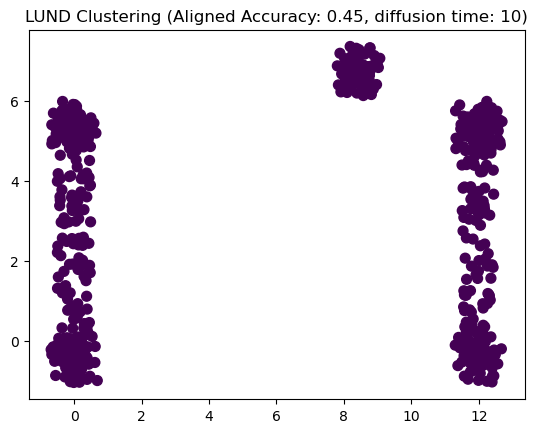

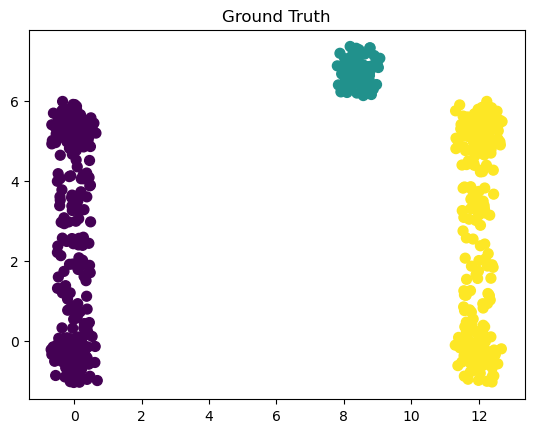

In [25]:
# print(X.shape)

kde = KernelDensity(bandwidth=1.0).fit(X)
# kde.fit(X)
log_density = kde.score_samples(X)
p = np.exp(log_density)
print(p.shape)

graph_extractor = GraphExtractor(sigma = 0.5, DiffusionNN = 10, NEigs=658)
G = graph_extractor.extract_graph(X)


print(GT.shape, "This is GT")

# 500 is a good diffusion time
t = 10
C, K, Dt = LearningbyUnsupervisedNonlinearDiffusion(X, t, G, p)

# GT = GT.astype(int)
# C = C.astype(int)
print("Unique GT labels:", np.unique(GT))
print("Unique cluster labels:", np.unique(C))

accuracy = calculate_aligned_accuracy(GT, C)
print("Aligned Accuracy:", accuracy)

plot_clusters(X, C, f"LUND Clustering (Aligned Accuracy: {accuracy:.2f}, diffusion time: {t})")
plot_clusters(X, GT, "Ground Truth")

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
from sklearn.datasets import make_moons, make_blobs, make_classification, make_circles
from sklearn.manifold import TSNE
from scipy.sparse.csgraph import laplacian
from scipy.spatial.distance import pdist, squareform
from lund.lund import LearningbyUnsupervisedNonlinearDiffusion
from lund.utils import GraphExtractor, diffusion_distance
from model.utils import loadHSI,calculate_aligned_accuracy
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd

# data_path, gt_path, data_name, gt_name = '/Users/seoli/Desktop/DIAMONDS/Tufts2024/data/SalinasA_corrected.mat', '/Users/seoli/Desktop/DIAMONDS/Tufts2024/data/SalinasA_gt.mat', 'salinasA_corrected', 'salinasA_gt'


# X, M, N, D, HSI, GT, Y, n, K = loadHSI(data_path, gt_path, data_name, gt_name)
n_samples = 100
n_clusters = 3
centers = [(-5, -5), (0, 0), (5, 5)]
cluster_std = 0.5

# Generate points for each cluster
points = []
labels = []

for i, center in enumerate(centers):
    x = np.random.normal(center[0], cluster_std, n_samples // n_clusters)
    y = np.random.normal(center[1], cluster_std, n_samples // n_clusters)
    cluster_points = np.column_stack((x, y))
    points.append(cluster_points)
    labels.append(np.full(n_samples // n_clusters, i))

points = np.vstack(points)
labels = np.concatenate(labels)

df = pd.DataFrame(points, columns=['Feature1', 'Feature2'])
df['Label'] = labels
df_sorted = df.sort_values(by=['Feature1', 'Feature2']).reset_index(drop=True)

X = df_sorted[['Feature1', 'Feature2']].values
GT = df_sorted['Label'].values

plt.scatter(X[:, 0], X[:, 1], c=GT, cmap='viridis')
plt.title('Generated and Sorted Points')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

scipy.io.savemat('data.mat', {'X': X, 'GT': GT})


grid_size = int(np.ceil(np.sqrt(X.shape[0])))
print("GRID SIZE: ", grid_size)

print("Data shape:", X.shape)

# GT = GT - 1
# HSI = X.reshape((M, N, D))
# Hyperparameters = {
#     'Sigma': 1.0,
#     'DiffusionNN': 10,
    
# }

kde = KernelDensity(bandwidth=1.0)
kde.fit(X)
log_density = kde.score_samples(X)
p = np.exp(log_density)

graph_extractor = GraphExtractor(sigma = 0.5, DiffusionNN = 10)
G = graph_extractor.extract_graph(X)


def plot_diffusion_distance(G, timestep, log_scale=False):
    if log_scale:
        timestep = np.log10(timestep)
    distances, embedding = diffusion_distance(G, timestep)
    plt.figure(figsize=(10, 8))
    sns.heatmap(distances, cmap='viridis')
    plt.title(f'Diffusion Distance Matrix at log10(t)={timestep:.2f}' if log_scale else f'Diffusion Distance Matrix at t={timestep}')
    plt.show()
    
# for timestep in [10, 40, 80, 100]:
#     print(f"Plotting for log10(t)={np.log10(timestep):.2f}")
#     plot_diffusion_distance(G, timestep, log_scale=False)

C, K, Dt = LearningbyUnsupervisedNonlinearDiffusion(X, 150, G, p)


# print("Cluster labels:", C)
# print("GT",GT)
print("Number of clusters:", K)

accuracy = calculate_aligned_accuracy(GT, C)
print("Aligned Accuracy:", accuracy)

def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.show()
    
def plot_kde_density(X, title):
    # Create the KDE plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(x=X[:, 0], y=X[:, 1], cmap='viridis', fill=True, levels=20, thresh=0)
    plt.scatter(X[:, 0], X[:, 1], c='red', s=5, edgecolor='k')
    plt.title(title)
    plt.show()


plot_clusters(X, C, f"LUND Clustering (Aligned Accuracy: {accuracy:.2f})")
plot_clusters(X, GT, "Ground Truth")
# plot_kde_density(X, "KDE Density Estimation")